In [ ]:
!pip install wfdb
!pip install py-ecg-detectors
!pip install BaselineRemoval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import scipy as sci
from scipy import signal
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import wfdb #library for reading ecg data https://github.com/MIT-LCP/wfdb-python/blob/main/demo.ipynb
from ecgdetectors import Detectors # desde https://pypi.org/project/py-ecg-detectors/
from hrv import HRV
from BaselineRemoval import BaselineRemoval
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open('/content/drive/Shareddrives/Proyecto Final/Progra/CONTROLS') as f:
  lines = f.readlines()

data = {
    
}

baseline = "/content/drive/Shareddrives/Proyecto Final/Progra/databases/PTB/"
for line in lines:
  data_string = line.split("/")
  baseline_data = baseline + data_string[0] + "/" + data_string[1]
  try:
    data[data_string[0]] = {}
    data[data_string[0]]["raw_data"] = record = wfdb.rdrecord(baseline_data.split("\n")[0])
  except:
    data.pop(data_string[0])

new_data = data
print(new_data)

{'patient104': {'raw_data': <wfdb.io.record.Record object at 0x7f857498ad90>}, 'patient105': {'raw_data': <wfdb.io.record.Record object at 0x7f857498ad00>}, 'patient116': {'raw_data': <wfdb.io.record.Record object at 0x7f857498ab20>}, 'patient117': {'raw_data': <wfdb.io.record.Record object at 0x7f857498adc0>}, 'patient121': {'raw_data': <wfdb.io.record.Record object at 0x7f857498abe0>}, 'patient122': {'raw_data': <wfdb.io.record.Record object at 0x7f8574ada100>}, 'patient131': {'raw_data': <wfdb.io.record.Record object at 0x7f8577688670>}, 'patient150': {'raw_data': <wfdb.io.record.Record object at 0x7f8574adac70>}, 'patient155': {'raw_data': <wfdb.io.record.Record object at 0x7f857498ac40>}, 'patient156': {'raw_data': <wfdb.io.record.Record object at 0x7f8574ad87c0>}, 'patient165': {'raw_data': <wfdb.io.record.Record object at 0x7f8574ad88b0>}, 'patient169': {'raw_data': <wfdb.io.record.Record object at 0x7f8574ad8520>}, 'patient170': {'raw_data': <wfdb.io.record.Record object at 0x7

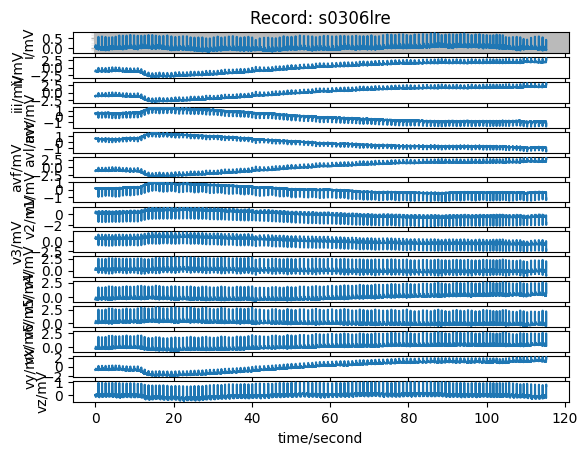

{'record_name': 's0306lre',
 'n_sig': 15,
 'fs': 1000,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 115200,
 'base_time': None,
 'base_date': None,
 'comments': ['age: 58',
  'sex: male',
  'ECG date: 13/07/1992',
  'Diagnose:',
  'Reason for admission: Healthy control',
  'Acute infarction (localization): no',
  'Former infarction (localization): no',
  'Additional diagnoses: no',
  'Smoker: unknown',
  'Number of coronary vessels involved: unknown',
  'Infarction date (acute): n/a',
  'Previous infarction (1) date: n/a',
  'Previous infarction (2) date: n/a',
  'Hemodynamics:',
  'Catheterization date: n/a',
  'Ventriculography: n/a',
  'Chest X-ray: n/a',
  'Peripheral blood Pressure (syst/diast): n/a',
  'Pulmonary artery pressure (at rest) (syst/diast): n/a',
  'Pulmonary artery pressure (at rest) (mean): n/a',
  'Pulmonary capillary wedge pressure (at rest): n/a',
  'Cardiac output (at rest): n/a',
  'Cardiac index (at rest): n/a',
  'Stroke volume index (at rest): n

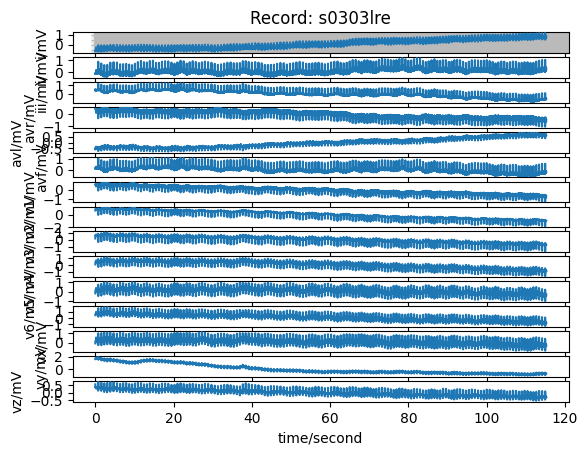

{'record_name': 's0303lre',
 'n_sig': 15,
 'fs': 1000,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 115200,
 'base_time': None,
 'base_date': None,
 'comments': ['age: 32',
  'sex: female',
  'ECG date: 24/06/1992',
  'Diagnose:',
  'Reason for admission: Healthy control',
  'Acute infarction (localization): no',
  'Former infarction (localization): no',
  'Additional diagnoses: no',
  'Smoker: unknown',
  'Number of coronary vessels involved: unknown',
  'Infarction date (acute): n/a',
  'Previous infarction (1) date: n/a',
  'Previous infarction (2) date: n/a',
  'Hemodynamics:',
  'Catheterization date: n/a',
  'Ventriculography: n/a',
  'Chest X-ray: n/a',
  'Peripheral blood Pressure (syst/diast): n/a',
  'Pulmonary artery pressure (at rest) (syst/diast): n/a',
  'Pulmonary artery pressure (at rest) (mean): n/a',
  'Pulmonary capillary wedge pressure (at rest): n/a',
  'Cardiac output (at rest): n/a',
  'Cardiac index (at rest): n/a',
  'Stroke volume index (at rest):

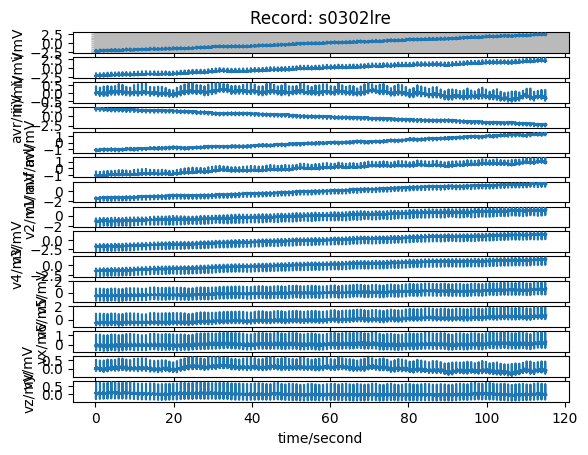

{'record_name': 's0302lre',
 'n_sig': 15,
 'fs': 1000,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 115200,
 'base_time': None,
 'base_date': None,
 'comments': ['age: 54',
  'sex: male',
  'ECG date: 19/06/1992',
  'Diagnose:',
  'Reason for admission: Healthy control',
  'Acute infarction (localization): no',
  'Former infarction (localization): no',
  'Additional diagnoses: no',
  'Smoker: unknown',
  'Number of coronary vessels involved: unknown',
  'Infarction date (acute): n/a',
  'Previous infarction (1) date: n/a',
  'Previous infarction (2) date: n/a',
  'Hemodynamics:',
  'Catheterization date: n/a',
  'Ventriculography: n/a',
  'Chest X-ray: n/a',
  'Peripheral blood Pressure (syst/diast): n/a',
  'Pulmonary artery pressure (at rest) (syst/diast): n/a',
  'Pulmonary artery pressure (at rest) (mean): n/a',
  'Pulmonary capillary wedge pressure (at rest): n/a',
  'Cardiac output (at rest): n/a',
  'Cardiac index (at rest): n/a',
  'Stroke volume index (at rest): n

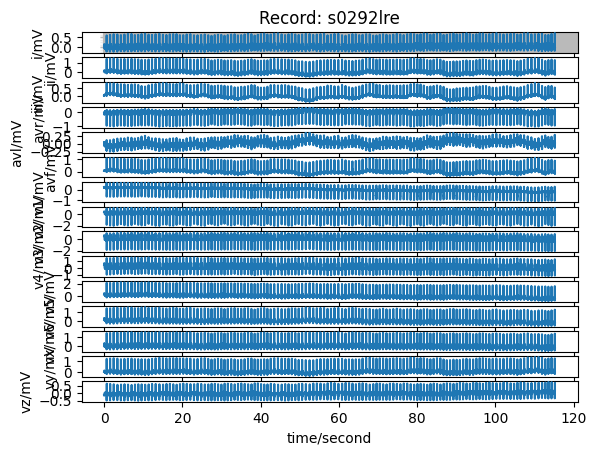

{'record_name': 's0292lre',
 'n_sig': 15,
 'fs': 1000,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 115200,
 'base_time': None,
 'base_date': None,
 'comments': ['age: 37',
  'sex: male',
  'ECG date: 07/04/1992',
  'Diagnose:',
  'Reason for admission: Healthy control',
  'Acute infarction (localization): no',
  'Former infarction (localization): no',
  'Additional diagnoses: no',
  'Smoker: unknown',
  'Number of coronary vessels involved: unknown',
  'Infarction date (acute): n/a',
  'Previous infarction (1) date: n/a',
  'Previous infarction (2) date: n/a',
  'Hemodynamics:',
  'Catheterization date: n/a',
  'Ventriculography: n/a',
  'Chest X-ray: n/a',
  'Peripheral blood Pressure (syst/diast): n/a',
  'Pulmonary artery pressure (at rest) (syst/diast): n/a',
  'Pulmonary artery pressure (at rest) (mean): n/a',
  'Pulmonary capillary wedge pressure (at rest): n/a',
  'Cardiac output (at rest): n/a',
  'Cardiac index (at rest): n/a',
  'Stroke volume index (at rest): n

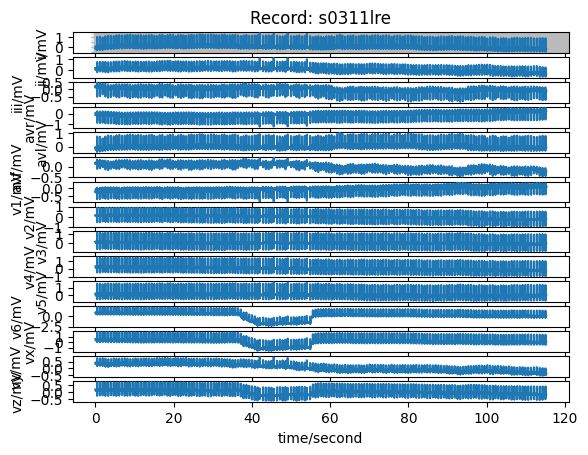

{'record_name': 's0311lre',
 'n_sig': 15,
 'fs': 1000,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 115200,
 'base_time': None,
 'base_date': None,
 'comments': ['age: 69',
  'sex: female',
  'ECG date: 21/07/1992',
  'Diagnose:',
  'Reason for admission: Healthy control',
  'Acute infarction (localization): no',
  'Former infarction (localization): no',
  'Additional diagnoses: no',
  'Smoker: unknown',
  'Number of coronary vessels involved: unknown',
  'Infarction date (acute): n/a',
  'Previous infarction (1) date: n/a',
  'Previous infarction (2) date: n/a',
  'Hemodynamics:',
  'Catheterization date: n/a',
  'Ventriculography: n/a',
  'Chest X-ray: n/a',
  'Peripheral blood Pressure (syst/diast): n/a',
  'Pulmonary artery pressure (at rest) (syst/diast): n/a',
  'Pulmonary artery pressure (at rest) (mean): n/a',
  'Pulmonary capillary wedge pressure (at rest): n/a',
  'Cardiac output (at rest): n/a',
  'Cardiac index (at rest): n/a',
  'Stroke volume index (at rest):

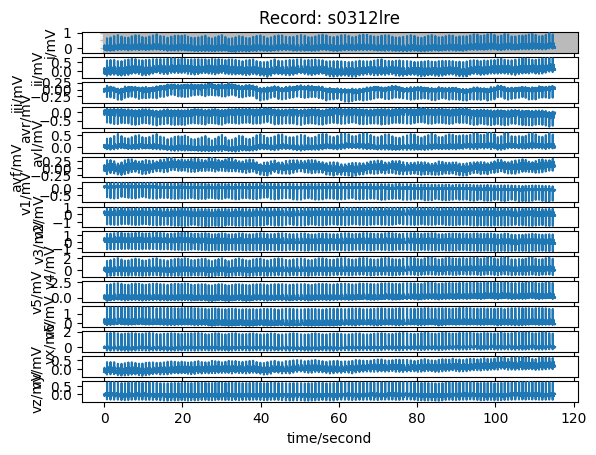

{'record_name': 's0312lre',
 'n_sig': 15,
 'fs': 1000,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 115200,
 'base_time': None,
 'base_date': None,
 'comments': ['age: 68',
  'sex: male',
  'ECG date: 21/07/1992',
  'Diagnose:',
  'Reason for admission: Healthy control',
  'Acute infarction (localization): no',
  'Former infarction (localization): no',
  'Additional diagnoses: no',
  'Smoker: unknown',
  'Number of coronary vessels involved: unknown',
  'Infarction date (acute): n/a',
  'Previous infarction (1) date: n/a',
  'Previous infarction (2) date: n/a',
  'Hemodynamics:',
  'Catheterization date: n/a',
  'Ventriculography: n/a',
  'Chest X-ray: n/a',
  'Peripheral blood Pressure (syst/diast): n/a',
  'Pulmonary artery pressure (at rest) (syst/diast): n/a',
  'Pulmonary artery pressure (at rest) (mean): n/a',
  'Pulmonary capillary wedge pressure (at rest): n/a',
  'Cardiac output (at rest): n/a',
  'Cardiac index (at rest): n/a',
  'Stroke volume index (at rest): n

KeyboardInterrupt: ignored

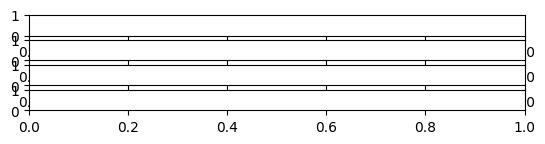

In [ ]:
for item in new_data:
  wfdb.plot_wfdb(record = new_data[item]["raw_data"] , ecg_grids = [0])
  display(new_data[item]["raw_data"].__dict__)

In [ ]:
new_data

{'patient104': {'raw_data': <wfdb.io.record.Record at 0x7f857498ad90>},
 'patient105': {'raw_data': <wfdb.io.record.Record at 0x7f857498ad00>},
 'patient116': {'raw_data': <wfdb.io.record.Record at 0x7f857498ab20>},
 'patient117': {'raw_data': <wfdb.io.record.Record at 0x7f857498adc0>},
 'patient121': {'raw_data': <wfdb.io.record.Record at 0x7f857498abe0>},
 'patient122': {'raw_data': <wfdb.io.record.Record at 0x7f8574ada100>},
 'patient131': {'raw_data': <wfdb.io.record.Record at 0x7f8577688670>},
 'patient150': {'raw_data': <wfdb.io.record.Record at 0x7f8574adac70>},
 'patient155': {'raw_data': <wfdb.io.record.Record at 0x7f857498ac40>},
 'patient156': {'raw_data': <wfdb.io.record.Record at 0x7f8574ad87c0>},
 'patient165': {'raw_data': <wfdb.io.record.Record at 0x7f8574ad88b0>},
 'patient169': {'raw_data': <wfdb.io.record.Record at 0x7f8574ad8520>},
 'patient170': {'raw_data': <wfdb.io.record.Record at 0x7f8574ad8a30>},
 'patient173': {'raw_data': <wfdb.io.record.Record at 0x7f8574ad

In [ ]:
# Obtenemos la edad y el sexo de cada uno de los pacientes para agregarlos a los features.

for item in new_data:
  dict_data = new_data[item]["raw_data"].__dict__
  new_data[item]["sex"] = dict_data['comments'][1].replace('sex: ', '')
  new_data[item]["age"] = dict_data['comments'][0].replace('age: ', '')

new_data

{'patient104': {'raw_data': <wfdb.io.record.Record at 0x7f857498ad90>,
  'sex': 'male',
  'age': '58'},
 'patient105': {'raw_data': <wfdb.io.record.Record at 0x7f857498ad00>,
  'sex': 'female',
  'age': '32'},
 'patient116': {'raw_data': <wfdb.io.record.Record at 0x7f857498ab20>,
  'sex': 'male',
  'age': '54'},
 'patient117': {'raw_data': <wfdb.io.record.Record at 0x7f857498adc0>,
  'sex': 'male',
  'age': '37'},
 'patient121': {'raw_data': <wfdb.io.record.Record at 0x7f857498abe0>,
  'sex': 'female',
  'age': '69'},
 'patient122': {'raw_data': <wfdb.io.record.Record at 0x7f8574ada100>,
  'sex': 'male',
  'age': '68'},
 'patient131': {'raw_data': <wfdb.io.record.Record at 0x7f8577688670>,
  'sex': 'male',
  'age': '26'},
 'patient150': {'raw_data': <wfdb.io.record.Record at 0x7f8574adac70>,
  'sex': 'male',
  'age': '36'},
 'patient155': {'raw_data': <wfdb.io.record.Record at 0x7f857498ac40>,
  'sex': 'male',
  'age': '37'},
 'patient156': {'raw_data': <wfdb.io.record.Record at 0x7f85

In [ ]:
ecg_df = new_data["p170"]["raw_data"].to_dataframe() # nos arroja el record como un dataframe que podemos editar, visualizar,y demas
ecg_df

KeyError: ignored

In [ ]:

#Aqui entra lo intenso, hacer un for loop de cada uno de los pacientes, hacerle filtrado a los datos y obtener los features importantes.

#Orden:
#1. Convertir ECG a dataframe
#2. Filtrar el baseline
#3. Cambiar el indice (pue k no sea necesario)
#4. Obtener las features
#5. Guardar las features en el diccionario

def baseline_filter(data):
  data_df = data.to_dataframe()
  sos = signal.butter(5, 15, 'hp', fs=1000, output='sos')
  filtered_df = pd.DataFrame(signal.sosfilt(sos, data_df), columns = data_df.columns.to_list())
  base_Obj = BaselineRemoval(data_df['ii'])
  b_rem_df=base_Obj.ZhangFit()
  return b_rem_df

def r_peak_detection(data):
  fs = 1000 # Si la frecuencia de sampleo cambia, aqui lo modificamos
  detectors = Detectors(fs)
  r_peaks = (detectors.wqrs_detector(data))
  return r_peaks

def r_peak_cleanup(data,r_peaks_data):
  r_peaks_filter = r_peaks_data
  for i in range(len(r_peaks_filter)):
    try:
      if data[r_peaks_filter[i]] < 0.2:
        r_peaks_filter.pop(i)
    except:
      break
  return r_peaks_filter

def features(r_peaks_data, data_item):

  fs = 1000
  hrv_class = HRV(fs)

  #tengo duda de qp con el heartrate

  heart_rate = HRV.HR(hrv_class, r_peaks_data)
  data_item["heart_rate_data"] = heart_rate
  data_item["heart_rate_std"] = heart_rate.std()
  heart_rate = heart_rate.mean()
  data_item["heart_rate"] = heart_rate
  

  data_item["nn20"] = HRV.NN20(hrv_class,r_peaks_data) #the number of pairs of successive NNs that differ by more than 20 ms.
  data_item["nn50"] = HRV.NN50(hrv_class,r_peaks_data) # the number of pairs of successive NNs that differ by more than 50 ms.
  data_item["pnn20"] = HRV.pNN20(hrv_class,r_peaks_data) # the proportion of NN20 divided by total number of NNs.
  data_item["pnn50"] = HRV.pNN50(hrv_class,r_peaks_data) # the proportion of NN50 divided by total number of NNs.
  data_item["rmssd"] = HRV.RMSSD(hrv_class,r_peaks_data) # (root mean square of successive differences).
  data_item["sdnn"]= HRV.SDNN(hrv_class,r_peaks_data) # the standard deviation of NN intervals.
  data_item["sdsd"] = HRV.SDSD(hrv_class,r_peaks_data) # Calculate SDSD (standard deviation of successive differences), the standard deviation of the successive differences between adjacent NNs.

  if heart_rate > 100 :
    data_item["tachycardia"] = 1
    data_item["bradycardia"] = 0
  elif heart_rate < 60:
    data_item["tachycardia"] = 0
    data_item["bradycardia"] = 1
  else:
    data_item["tachycardia"] = 0
    data_item["bradycardia"] = 0

  data_item["arrythmia"] = 0 #Esto es solo para el caso de healthy patients

final_data = new_data

for item in final_data:
  filtered_data = baseline_filter(final_data[item]["raw_data"])
  final_data[item]["filtered_data"] = filtered_data
  r_peaks_data = r_peak_detection(filtered_data)
  r_peaks_clean = r_peak_cleanup(filtered_data, r_peaks_data)
  final_data[item]["r_peaks"] = r_peaks_clean
  features (r_peaks_clean,final_data[item])

final_data



{'patient104': {'raw_data': <wfdb.io.record.Record at 0x7f857498ad90>,
  'sex': 'male',
  'age': '58',
  'filtered_data': array([-3.91434522e-03, -3.95348867e-03, -5.32169815e-04, ...,
          6.28628332e-01,  5.55881976e-01,  5.24635619e-01]),
  'r_peaks': [694,
   1699,
   2614,
   3472,
   4317,
   5192,
   6109,
   7039,
   7975,
   8934,
   9900,
   10842,
   11734,
   12609,
   13577,
   14548,
   15464,
   16374,
   17367,
   18388,
   19430,
   20436,
   21404,
   22398,
   23401,
   24351,
   25326,
   26332,
   27345,
   28309,
   29264,
   30267,
   31258,
   32196,
   33120,
   34116,
   35135,
   36140,
   37102,
   38096,
   39096,
   40059,
   40999,
   42021,
   43099,
   44159,
   45167,
   46118,
   47104,
   48113,
   49098,
   50110,
   51165,
   52258,
   53304,
   54363,
   55409,
   56372,
   57349,
   58367,
   59408,
   60475,
   61545,
   62609,
   63620,
   64598,
   65616,
   66618,
   67571,
   68501,
   69533,
   70540,
   71513,
   72480,
   73507,
   7

In [ ]:
final_data_df = pd.DataFrame.from_dict(final_data, orient = 'index')

final_data_df = final_data_df.join(pd.get_dummies(final_data_df["sex"])).drop("sex", axis = 1)



In [ ]:
from matplotlib.cbook import print_cycles
for item in final_data:
  data = pd.DataFrame(final_data[item]["filtered_data"])
  x = list(range(0, len(data)))
  data_r_peaks = final_data[item]["r_peaks"]
  data.reset_index(inplace=True,drop=True)
  # print(data[data_r_peaks])
  # print(data.index.isin(data_r_peaks))
  print(data_r_peaks)
  # print(data_r_peaks)
  plt.figure()
  ax = plt.axes()
  plt.plot(x, data)
  plt.plot(data_r_peaks, data[data_r_peaks], 'ro')
  ax.set_xlim([0,10000])
  # plt.title(method)

<Axes: >

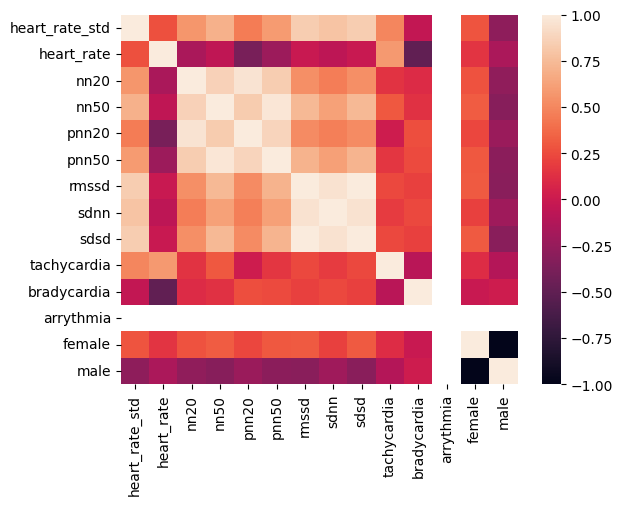

In [ ]:
corr = final_data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,
        yticklabels=corr.columns)

Se ve rara la matriz de correlacion porque no hay datos de pacientes con arritmia ni bardicardia.

In [ ]:
from pathlib import Path  
filepath = Path('/content/drive/Shareddrives/Proyecto Final/Progra/feature_extraction_test2.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  

final_data_df.to_csv(filepath)
# final_data_df.to_excel(filepath)

Falta agregar un loop para cargar automaticamente todos los datos de los healthy controls.

In [ ]:
final_data_df

,raw_data,age,filtered_data,r_peaks,heart_rate_data,heart_rate_std,heart_rate,nn20,nn50,pnn20,pnn50,rmssd,sdnn,sdsd,tachycardia,bradycardia,arrythmia,female,male
patient104,<wfdb.io.record.Record object at 0x7f857498ad90>,58,"[-0.00391434521733891, -0.0039534886694505555,...","[694, 1699, 2614, 3472, 4317, 5192, 6109, 7039...","[59.70149253731344, 65.57377049180327, 69.9300...",4.362946,62.130428,83,27,0.703390,0.228814,44.053386,63.934770,44.045094,0,0,0,0,1
patient105,<wfdb.io.record.Record object at 0x7f857498ad00>,32,"[0.03236560049226943, 0.03468925647472938, 0.0...","[355, 1057, 1511, 2273, 3030, 3818, 4652, 5520...","[85.47008547008548, 132.15859030837004, 78.740...",5.633095,78.345730,58,3,0.389262,0.020134,38.888441,43.628699,38.883895,0,0,0,1,0
patient116,<wfdb.io.record.Record object at 0x7f857498ab20>,54,"[0.050295101342937354, 0.04779805235529144, 0....","[1172, 2150, 3118, 4090, 5040, 5981, 6933, 790...","[61.34969325153374, 61.98347107438017, 61.7283...",1.614669,61.749695,19,0,0.162393,0.000000,14.541558,25.911144,14.537261,0,0,0,0,1
patient117,<wfdb.io.record.Record object at 0x7f857498adc0>,37,"[0.030178698075719643, 0.03398048486421708, 0....","[552, 1530, 2447, 3392, 4302, 5196, 6096, 7009...","[61.34969325153374, 65.43075245365321, 63.4920...",3.118077,68.727612,54,10,0.412214,0.076336,27.463542,40.185477,27.440569,0,0,0,0,1
patient121,<wfdb.io.record.Record object at 0x7f857498abe0>,69,"[0.07844598034270675, 0.07473043990942714, 0.0...","[359, 1861, 2565, 3279, 3985, 4689, 5393, 6101...","[39.94673768308922, 85.22727272727273, 84.0336...",5.507096,85.829396,13,13,0.079755,0.079755,82.621030,71.181453,82.485616,0,0,0,1,0
patient122,<wfdb.io.record.Record object at 0x7f8574ada100>,68,"[-0.0014804039424996668, 0.002004792035200764,...","[658, 1650, 2581, 3533, 4455, 5326, 6205, 7087...","[60.483870967741936, 64.44683136412459, 63.025...",2.948123,66.464272,54,14,0.428571,0.111111,28.634664,39.910166,28.621867,0,0,0,0,1
patient131,<wfdb.io.record.Record object at 0x7f8577688670>,26,"[0.016387176084569077, 0.024051047764441336, 0...","[355, 1036, 1619, 2198, 2772, 3346, 3915, 4481...","[88.10572687224669, 102.91595197255575, 103.62...",3.188923,102.765246,1,1,0.005102,0.005102,7.817797,18.518331,7.797419,1,0,0,0,1
patient150,<wfdb.io.record.Record object at 0x7f8574adac70>,36,"[0.013026832004187971, 0.012657100324094062, 0...","[426, 1287, 2208, 3136, 4089, 5020, 5922, 6801...","[69.68641114982579, 65.14657980456026, 64.6551...",10.567295,68.111909,69,12,0.539062,0.093750,135.977216,86.914625,135.977049,0,0,0,0,1
patient155,<wfdb.io.record.Record object at 0x7f857498ac40>,37,"[0.06854984916697765, 0.06073534761530415, 0.0...","[806, 1558, 2326, 3130, 3921, 4677, 5430, 6194...","[79.7872340425532, 78.125, 74.62686567164178, ...",3.980082,77.962706,66,12,0.445946,0.081081,26.828506,39.212318,26.819531,0,0,0,0,1
patient156,<wfdb.io.record.Record object at 0x7f8574ad87c0>,17,"[0.06310613916173413, 0.055237200439223894, 0....","[1190, 2191, 3094, 3941, 4774, 5659, 6609, 744...","[59.940059940059946, 66.44518272425249, 70.838...",5.275868,70.067182,95,57,0.719697,0.431818,68.834241,68.038773,68.833182,0,0,0,0,1
